In [1]:
import pandas as pd
import numpy as np
import datetime
data = pd.read_csv("C:\\Users\\Rabat\\Downloads\\General\\General\\02 Набор данных\\with_closed_ations_as________select_app_2020_X5_STORES.CSV")

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
le_masque = data['position_name'] == 'Продавец-кассир'
le_masque &= data['is_active_action'] == True
df = data[le_masque]
df

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,4797513,3847682,-1,7335,2020-03-23 19:57:25.316022+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
3,4788965,3843286,-1,10613,2020-03-20 16:09:34.454329+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
4,4777310,2372866,-1,45445,2020-03-18 13:53:36.124784+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
11,4798971,1253935,-1,9851,2020-03-24 10:39:28.667648+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
13,4637426,3352131,-1,7640,2020-02-13 12:44:35.802112+00,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
...,...,...,...,...,...,...,...,...,...,...,...
739675,4825142,2952699,-1,32061,2020-04-23 16:26:11.80918+00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,True,True
739676,4736341,936507,-1,32061,2020-04-23 16:26:11.80918+00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,True,True
739678,4782853,2753502,-1,32110,2020-04-23 16:26:11.80918+00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,True,True
739679,4769924,3823657,-1,32110,2020-04-23 16:26:11.80918+00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,True,True


In [3]:
df_new = df.copy()

In [4]:
def convert(val):
    if val.find(".") == -1:
        if val.find("+") == -1:
            date_time_obj = "Null"
        else:
            val = val[:val.find("+")]
            date_time_obj = datetime.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    else:
        val = val[:val.find(".")]
        date_time_obj = datetime.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    return date_time_obj

In [5]:
df_new['action_date'] = df_new['action_date'].apply(convert)

In [6]:
df_new = df_new.sort_values(by = ['id_partner', 'action_date'])
df_new

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
133855,4492661,530570,-1,48879,2020-01-14 11:49:41,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
67800,4698826,530611,-1,12476,2020-02-27 16:16:21,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
129783,4859533,530654,-1,32944,2020-04-08 09:03:25,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
249942,4859533,530654,26944118,32944,2020-04-08 09:04:16,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
249941,4859533,530654,26944119,32944,2020-04-08 09:04:17,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
...,...,...,...,...,...,...,...,...,...,...,...
662018,4886612,3897226,27106019,32875,2020-04-14 11:09:07,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
662019,4886612,3897226,27106020,32875,2020-04-14 11:09:08,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
734844,4886612,3897226,-1,32875,2020-04-23 16:26:11,СБ,Узнать результаты СБ,NaN,Продавец-кассир,True,True
185790,4886610,3897231,-1,30523,2020-04-14 11:08:31,Создание кандидата,NaN,NaN,Продавец-кассир,True,False


In [8]:
parthner_array = df_new[df_new['result_name'] == 'Принят']['id_partner'].unique() # время найма по людям
tth=[]
for i in parthner_array:
    parthner = df_new[df_new['id_partner'] == i]
    tth.append(max(parthner['action_date'])-min(parthner['action_date']))


In [8]:
parthner_array = df_new[df_new['result_name'] == 'Принят']['id_applicant'].unique() # время найма по заявкам
tth = pd.DataFrame(columns=('Обработка', 'Интервью с руководителем', 'СБ', 'Оформление'))
for i in parthner_array:
    parthner = df_new[df_new['id_applicant'] == i]
    
    if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
    else:
        treatment = None
        
    if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
        interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
    else:
        interview = None
        
    if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
        secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
    else:
        secServ = None
        
    if len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0:
        registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
    else:
        registration = None
        
    tth.loc[i] = [treatment, interview, secServ, registration]
tth

,Обработка,Интервью с руководителем,СБ,Оформление
4845101,0 days 00:00:23,0 days 00:00:01,0 days 18:14:47,4 days 04:50:53
4880681,0 days 00:00:29,0 days 00:00:02,0 days 00:00:04,0 days 00:00:11
4786590,NaT,NaT,NaT,4 days 21:28:57
4838086,0 days 00:00:19,0 days 00:00:02,0 days 02:10:47,5 days 04:12:02
4808982,0 days 00:03:15,0 days 00:00:00,0 days 00:00:01,0 days 00:01:03
...,...,...,...,...
4870239,0 days 00:00:21,0 days 00:00:01,0 days 12:13:33,3 days 00:07:12
4883604,0 days 00:00:11,0 days 00:00:01,0 days 00:00:01,0 days 00:00:04
4870328,0 days 00:00:17,0 days 00:00:00,0 days 02:11:20,3 days 02:49:44
4870452,0 days 00:00:50,0 days 00:00:01,0 days 01:05:45,3 days 03:33:04


In [9]:
NE_SCITAT = tth.isnull()[(tth.isnull()['Обработка']==True) & (tth.isnull()['Интервью с руководителем']==True)& (tth.isnull()['СБ']==True)& (tth.isnull()['Оформление']==False)]
NE_SCITAT

,Обработка,Интервью с руководителем,СБ,Оформление
4786590,True,True,True,False
4759645,True,True,True,False
4796687,True,True,True,False
4803653,True,True,True,False
4770251,True,True,True,False
...,...,...,...,...
4807201,True,True,True,False
4807235,True,True,True,False
4807276,True,True,True,False
4807333,True,True,True,False


In [10]:
parthner_array

array([4845101, 4880681, 4786590, ..., 4870328, 4870452, 4883517],
      dtype=int64)

In [11]:
NE_SCITAT.index

Int64Index([4786590, 4759645, 4796687, 4803653, 4770251, 4767530, 4803876,
            4762515, 4716773, 4757410,
            ...
            4806649, 4806663, 4806738, 4807034, 4807208, 4807201, 4807235,
            4807276, 4807333, 4807329],
           dtype='int64', length=1931)

In [12]:
len(parthner_array.tolist())

7042

In [13]:
len(NE_SCITAT.index.tolist())

1931

In [14]:
parthner_array1 = parthner_array.tolist()
NE_SCITAT1 = NE_SCITAT.index.tolist()
for i in NE_SCITAT1:
    if i in parthner_array1:
        parthner_array1.remove(i)

In [15]:
len(parthner_array1)

5111

In [17]:
parthner_array1[6]

4835073

In [16]:
tth_ITOG=[]
tth_ITOG = pd.DataFrame(columns=('Time to hire','Обработка', 'Интервью с руководителем', 'СБ', 'Оформление' ))
for i in parthner_array1:
    parthner = df_new[df_new['id_applicant'] == i]
    time_to_hire = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])-min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
    if len(parthner[parthner['stage_name'] == 'Обработка']['action_date'])!=0:
        treatment = max(parthner[parthner['stage_name'] == 'Обработка']['action_date']) - min(parthner[parthner['stage_name'] == 'Создание кандидата']['action_date'])
    else:
        treatment = None
        
    if len(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])!=0:
        interview = max(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])- min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date'])
    else:
        interview = None
        
    if len(parthner[parthner['stage_name'] == 'СБ']['action_date'])!=0:
        secServ = max(parthner[parthner['stage_name'] == 'СБ']['action_date'])- min(parthner[parthner['stage_name'] == 'СБ']['action_date'])
    else:
        secServ = None
        
    if len(parthner[parthner['stage_name'] == 'Оформление']['action_date'])!=0:
        registration = max(parthner[(parthner['stage_name'] == 'Оформление') & (parthner['result_name'] == 'Принят')]['action_date'])- min(parthner[parthner['stage_name'] == 'Оформление']['action_date'])
    else:
        registration = None
    tth_ITOG.loc[i] = [time_to_hire,treatment,interview,secServ,registration]
tth_ITOG

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
4845101,9 days 00:12:24,0 days 00:00:23,0 days 00:00:01,0 days 18:14:47,4 days 04:50:53
4880681,0 days 00:00:53,0 days 00:00:29,0 days 00:00:02,0 days 00:00:04,0 days 00:00:11
4838086,6 days 03:41:56,0 days 00:00:19,0 days 00:00:02,0 days 02:10:47,5 days 04:12:02
4808982,0 days 00:04:21,0 days 00:03:15,0 days 00:00:00,0 days 00:00:01,0 days 00:01:03
4821902,13 days 23:32:28,0 days 00:00:23,0 days 00:00:01,0 days 02:00:55,12 days 22:57:34
...,...,...,...,...,...
4870239,3 days 18:41:51,0 days 00:00:21,0 days 00:00:01,0 days 12:13:33,3 days 00:07:12
4883604,0 days 00:00:22,0 days 00:00:11,0 days 00:00:01,0 days 00:00:01,0 days 00:00:04
4870328,3 days 10:32:36,0 days 00:00:17,0 days 00:00:00,0 days 02:11:20,3 days 02:49:44
4870452,3 days 10:32:25,0 days 00:00:50,0 days 00:00:01,0 days 01:05:45,3 days 03:33:04


In [17]:
tth_ITOG.describe()

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
count,5111,4955,5057,5111,5111
mean,3 days 13:46:12.090980238,0 days 00:10:42.293642785,0 days 05:08:36.326675894,0 days 04:50:36.113285071,2 days 07:54:41.372529837
std,4 days 10:21:50.402133890,0 days 05:45:33.721710957,0 days 23:40:04.512646033,0 days 10:31:22.040426009,3 days 07:35:23.999714421
min,0 days 00:00:16,0 days 00:00:05,0 days 00:00:00,0 days 00:00:00,0 days 00:00:03
25%,0 days 00:00:34,0 days 00:00:15,0 days 00:00:01,0 days 00:00:02,0 days 00:00:06
50%,1 days 22:57:49,0 days 00:00:19,0 days 00:00:01,0 days 00:00:03,0 days 00:00:29
75%,6 days 06:29:31.500000,0 days 00:00:26,0 days 00:00:01,0 days 02:38:36,4 days 03:45:22
max,49 days 04:30:09,13 days 02:26:54,14 days 05:49:54,11 days 06:46:49,18 days 03:36:11


In [18]:
delta_TTH = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=8, 
                           weeks=0)

In [19]:
delta_SB = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=30, 
                           hours=0, 
                           weeks=0)

In [20]:
delta_INTER = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=10, 
                           hours=0, 
                           weeks=0)

In [21]:
tth_ITOG1 = tth_ITOG
tth_ITOG1 = tth_ITOG1.loc[tth_ITOG1['Time to hire'] >= delta_TTH]
#tth_ITOG1 = tth_ITOG1.loc[tth_ITOG1['СБ'] >= delta_SB]
#tth_ITOG1 = tth_ITOG1.loc[tth_ITOG1['Интервью с руководителем'] >= delta_INTER]
tth_ITOG1

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
4845101,9 days 00:12:24,0 days 00:00:23,0 days 00:00:01,0 days 18:14:47,4 days 04:50:53
4838086,6 days 03:41:56,0 days 00:00:19,0 days 00:00:02,0 days 02:10:47,5 days 04:12:02
4821902,13 days 23:32:28,0 days 00:00:23,0 days 00:00:01,0 days 02:00:55,12 days 22:57:34
4835073,6 days 03:56:40,0 days 00:02:56,0 days 00:00:00,0 days 01:47:34,4 days 03:02:45
4819703,3 days 19:52:13,0 days 00:00:19,0 days 00:00:01,0 days 16:47:17,2 days 04:04:06
...,...,...,...,...,...
4869744,3 days 20:11:54,0 days 00:00:17,0 days 00:00:00,0 days 14:45:01,2 days 22:33:24
4869939,0 days 22:27:23,0 days 00:00:17,0 days 00:00:01,0 days 14:25:29,0 days 02:58:34
4870239,3 days 18:41:51,0 days 00:00:21,0 days 00:00:01,0 days 12:13:33,3 days 00:07:12
4870328,3 days 10:32:36,0 days 00:00:17,0 days 00:00:00,0 days 02:11:20,3 days 02:49:44


In [22]:
tth_ITOG1.describe()

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
count,2638,2482,2584,2638,2638
mean,6 days 22:08:59.640257771,0 days 00:20:57.101128122,0 days 10:03:56.333204334,0 days 09:22:58.487490523,4 days 12:18:41.520849128
std,3 days 20:32:48.973090405,0 days 08:08:05.268672193,1 days 08:21:22.235168570,0 days 13:06:48.774672705,3 days 09:13:46.387647782
min,0 days 16:30:24,0 days 00:00:05,0 days 00:00:00,0 days 00:00:00,0 days 00:00:03
25%,4 days 05:55:22.500000,0 days 00:00:15,0 days 00:00:01,0 days 01:47:14.250000,1 days 23:32:09
50%,6 days 04:54:51.500000,0 days 00:00:19,0 days 00:00:01,0 days 02:29:15.500000,4 days 02:56:48
75%,8 days 18:12:48.500000,0 days 00:00:27,0 days 00:00:01,0 days 16:08:46,6 days 05:40:05.500000
max,49 days 04:30:09,13 days 02:26:54,14 days 05:49:54,11 days 06:46:49,18 days 03:36:11


In [43]:
delta_TTH = datetime.timedelta(days=20, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=0, 
                           weeks=0)

In [44]:
tth_ITOG2 = tth_ITOG1
tth_ITOG2 = tth_ITOG2.loc[tth_ITOG2['Time to hire'] >= delta_TTH]
#tth_ITOG1 = tth_ITOG1.loc[tth_ITOG1['СБ'] >= delta_SB]
#tth_ITOG1 = tth_ITOG1.loc[tth_ITOG1['Интервью с руководителем'] >= delta_INTER]
tth_ITOG2

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
4640976,49 days 04:30:09,NaT,NaT,0 days 00:00:01,0 days 00:00:05
4681851,41 days 05:34:02,NaT,0 days 00:00:00,0 days 20:39:40,7 days 00:36:12
4785077,24 days 04:08:44,NaT,NaT,0 days 00:00:01,12 days 18:47:01
4748319,21 days 22:24:48,NaT,NaT,0 days 00:00:01,0 days 00:00:05
4723757,29 days 23:54:37,NaT,NaT,0 days 00:00:00,0 days 00:00:06
4716107,29 days 04:43:23,NaT,NaT,0 days 00:00:01,0 days 00:00:08
4702355,33 days 03:19:29,NaT,NaT,0 days 00:00:01,0 days 00:00:06
4770507,27 days 02:07:50,NaT,0 days 00:00:00,0 days 00:00:02,0 days 00:00:06
4716037,29 days 04:41:35,NaT,NaT,0 days 00:00:01,0 days 00:00:18
4727332,29 days 04:34:35,NaT,NaT,0 days 00:00:00,0 days 00:00:07


In [191]:
df_new[df_new['id_applicant'] == 4640976]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
165833,4640976,699708,-1,48582,2020-02-14 09:16:14,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
603784,4640976,699708,26837249,48582,2020-04-03 13:46:16,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
603783,4640976,699708,26837251,48582,2020-04-03 13:46:17,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
603782,4640976,699708,26837253,48582,2020-04-03 13:46:18,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False
603781,4640976,699708,26837258,48582,2020-04-03 13:46:23,Оформление,Узнать результаты приема,Принят,Продавец-кассир,True,False


In [193]:
df_new[df_new['id_applicant'] == 4681851]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
131709,4681851,1287927,-1,49408,2020-02-25 09:35:09,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
316386,4681851,1287927,26713384,49408,2020-03-29 12:00:25,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
316387,4681851,1287927,26713385,49408,2020-03-29 12:00:25,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
316385,4681851,1287927,26719767,49408,2020-03-30 08:40:04,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
316384,4681851,1287927,26719769,49408,2020-03-30 08:40:05,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
316383,4681851,1287927,26735932,49408,2020-03-30 14:32:59,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False
316382,4681851,1287927,26895438,49408,2020-04-06 15:09:11,Оформление,Узнать результаты приема,Принят,Продавец-кассир,True,False


In [194]:
df_new[df_new['id_applicant'] == 4785077]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
191660,4785077,1901780,-1,43851,2020-03-20 08:13:11,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
458516,4785077,1901780,26743280,43851,2020-03-30 16:49:19,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
458517,4785077,1901780,26743281,43851,2020-03-30 16:49:20,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
458515,4785077,1901780,26775818,43851,2020-03-31 17:34:54,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False
458514,4785077,1901780,26801790,43851,2020-04-02 09:33:55,Оформление,Узнать результаты приема,Нет обратной связи от руководителя,Продавец-кассир,True,False
458513,4785077,1901780,26819286,43851,2020-04-02 16:05:20,Оформление,Предоставить обратную связь по кандидату,ОС не предоставлена руководителем,Продавец-кассир,True,False
458512,4785077,1901780,26838527,43851,2020-04-03 14:05:12,Оформление,Предоставить обратную связь по кандидату,ОС не предоставлена руководителем,Продавец-кассир,True,False
458511,4785077,1901780,26886247,43851,2020-04-06 12:05:42,Оформление,Предоставить обратную связь по кандидату,ОС не предоставлена руководителем,Продавец-кассир,True,False
458510,4785077,1901780,26907402,43851,2020-04-07 07:02:04,Оформление,Предоставить обратную связь по кандидату,ОС не предоставлена руководителем,Продавец-кассир,True,False
458509,4785077,1901780,26922917,43851,2020-04-07 13:03:11,Оформление,Предоставить обратную связь по кандидату,ОС не предоставлена руководителем,Продавец-кассир,True,False


In [195]:
df_new[df_new['id_applicant'] == 4663261]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
48922,4663261,3762700,-1,8170,2020-02-19 12:25:22,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
519976,4663261,3762700,26638206,8170,2020-03-25 17:15:24,Интервью с руководителем,Предоставить обратную связь по кандидату,ОС предоставлена руководителем,Продавец-кассир,True,False
519974,4663261,3762700,26638215,8170,2020-03-25 17:15:33,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
519975,4663261,3762700,26638217,8170,2020-03-25 17:15:34,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
519973,4663261,3762700,26644269,8170,2020-03-26 08:54:21,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
519972,4663261,3762700,26644271,8170,2020-03-26 08:54:22,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
519971,4663261,3762700,26661090,8170,2020-03-26 13:00:02,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False
519970,4663261,3762700,26661093,8170,2020-03-26 13:00:05,Оформление,Узнать результаты приема,Нет обратной связи от руководителя,Продавец-кассир,True,False
519969,4663261,3762700,26685738,8170,2020-03-27 11:02:08,Оформление,Предоставить обратную связь по кандидату,ОС не предоставлена руководителем,Продавец-кассир,True,False
519968,4663261,3762700,26720629,8170,2020-03-30 09:02:04,Оформление,Предоставить обратную связь по кандидату,ОС не предоставлена руководителем,Продавец-кассир,True,False


In [196]:
df_new[df_new['id_applicant'] == 4748319]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
25446,4748319,2892399,-1,25039,2020-03-11 15:25:17,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
548230,4748319,2892399,26812995,25039,2020-04-02 13:49:58,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
548229,4748319,2892399,26812996,25039,2020-04-02 13:49:59,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
548228,4748319,2892399,26812997,25039,2020-04-02 13:50:00,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False
548227,4748319,2892399,26813001,25039,2020-04-02 13:50:05,Оформление,Узнать результаты приема,Принят,Продавец-кассир,True,False


In [197]:
df_new[df_new['id_applicant'] == 4723757]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
62461,4723757,2944440,-1,8796,2020-03-04 14:16:31,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
533203,4723757,2944440,26838888,8796,2020-04-03 14:11:01,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
533204,4723757,2944440,26838887,8796,2020-04-03 14:11:01,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
533202,4723757,2944440,26838889,8796,2020-04-03 14:11:02,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False
533201,4723757,2944440,26838895,8796,2020-04-03 14:11:08,Оформление,Узнать результаты приема,Принят,Продавец-кассир,True,False


In [198]:
df_new[df_new['id_applicant'] == 4716107]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
80769,4716107,3005338,-1,31373,2020-03-03 11:58:15,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
529607,4716107,3005338,26796507,31373,2020-04-01 16:41:28,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
529606,4716107,3005338,26796508,31373,2020-04-01 16:41:29,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
529605,4716107,3005338,26796511,31373,2020-04-01 16:41:30,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False
529604,4716107,3005338,26796518,31373,2020-04-01 16:41:38,Оформление,Узнать результаты приема,Принят,Продавец-кассир,True,False


In [192]:
df_new[df_new['id_partner'] == 699708]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
165833,4640976,699708,-1,48582,2020-02-14 09:16:14,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
603784,4640976,699708,26837249,48582,2020-04-03 13:46:16,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
603783,4640976,699708,26837251,48582,2020-04-03 13:46:17,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
603782,4640976,699708,26837253,48582,2020-04-03 13:46:18,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False
603781,4640976,699708,26837258,48582,2020-04-03 13:46:23,Оформление,Узнать результаты приема,Принят,Продавец-кассир,True,False


In [73]:
import matplotlib.pyplot as plt

In [74]:
tthDays=[]
for i in tth_ITOG1['Time to hire']:
    tthDays.append(i.days)

[]

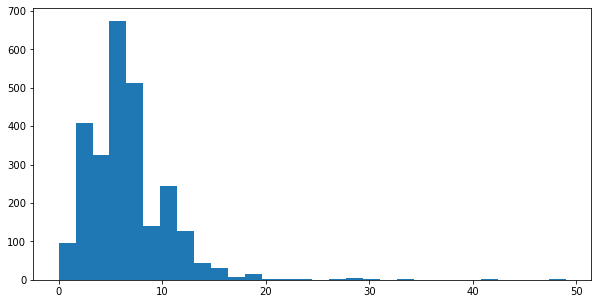

In [75]:
tthDays=[]
for i in tth_ITOG1['Time to hire']:
    tthDays.append(i.days)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()

In [23]:
tth_ITOG1

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
4845101,9 days 00:12:24,0 days 00:00:23,0 days 00:00:01,0 days 18:14:47,4 days 04:50:53
4838086,6 days 03:41:56,0 days 00:00:19,0 days 00:00:02,0 days 02:10:47,5 days 04:12:02
4821902,13 days 23:32:28,0 days 00:00:23,0 days 00:00:01,0 days 02:00:55,12 days 22:57:34
4835073,6 days 03:56:40,0 days 00:02:56,0 days 00:00:00,0 days 01:47:34,4 days 03:02:45
4819703,3 days 19:52:13,0 days 00:00:19,0 days 00:00:01,0 days 16:47:17,2 days 04:04:06
...,...,...,...,...,...
4869744,3 days 20:11:54,0 days 00:00:17,0 days 00:00:00,0 days 14:45:01,2 days 22:33:24
4869939,0 days 22:27:23,0 days 00:00:17,0 days 00:00:01,0 days 14:25:29,0 days 02:58:34
4870239,3 days 18:41:51,0 days 00:00:21,0 days 00:00:01,0 days 12:13:33,3 days 00:07:12
4870328,3 days 10:32:36,0 days 00:00:17,0 days 00:00:00,0 days 02:11:20,3 days 02:49:44


In [24]:
tth_procce = tth_ITOG1.drop(['Интервью с руководителем','СБ','Оформление','Time to hire'], axis = 1)
tth_procce = tth_procce.dropna(axis=0,how='all')
tth_procce

,Обработка
4845101,0 days 00:00:23
4838086,0 days 00:00:19
4821902,0 days 00:00:23
4835073,0 days 00:02:56
4819703,0 days 00:00:19
...,...
4869744,0 days 00:00:17
4869939,0 days 00:00:17
4870239,0 days 00:00:21
4870328,0 days 00:00:17


In [25]:
a = []
for i in tth_procce.index.tolist():
    parthner = df_new[df_new['id_applicant'] == i]
    a.append(min(parthner[parthner['stage_name'] == 'Обработка']['action_date']).month)


In [26]:
tth_procce['month'] = a

In [27]:
tth_procce

,Обработка,month
4845101,0 days 00:00:23,4
4838086,0 days 00:00:19,4
4821902,0 days 00:00:23,3
4835073,0 days 00:02:56,4
4819703,0 days 00:00:19,3
...,...,...
4869744,0 days 00:00:17,4
4869939,0 days 00:00:17,4
4870239,0 days 00:00:21,4
4870328,0 days 00:00:17,4


In [28]:
tth_procce_4 = tth_procce[tth_procce['month'] == 4]

In [29]:
tth_procce_3 = tth_procce[tth_procce['month'] == 3]

In [30]:
tth_procce_4.describe()

,Обработка,month
count,1226,1226.0
mean,0 days 00:28:29.225938009,4.0
std,0 days 10:14:26.285023985,0.0
min,0 days 00:00:06,4.0
25%,0 days 00:00:15,4.0
50%,0 days 00:00:19,4.0
75%,0 days 00:00:27,4.0
max,13 days 02:26:54,4.0


In [31]:
tth_procce_3.describe()

,Обработка,month
count,1256,1256.0
mean,0 days 00:13:35.775477707,3.0
std,0 days 05:19:53.948386870,0.0
min,0 days 00:00:05,3.0
25%,0 days 00:00:15,3.0
50%,0 days 00:00:20,3.0
75%,0 days 00:00:28,3.0
max,6 days 20:51:28,3.0


In [32]:
delta_pro = datetime.timedelta(days=1, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=0, 
                           weeks=0)
tth_procce1_4 = tth_procce_4
tth_procce1_4 = tth_procce1_4.loc[tth_procce1_4['Обработка'] < delta_pro]
#tth_ITOG1 = tth_ITOG1.loc[tth_ITOG1['СБ'] >= delta_SB]
#tth_ITOG1 = tth_ITOG1.loc[tth_ITOG1['Интервью с руководителем'] >= delta_INTER]
tth_procce1_4

,Обработка,month
4845101,0 days 00:00:23,4
4838086,0 days 00:00:19,4
4835073,0 days 00:02:56,4
4848395,0 days 00:00:22,4
4847563,0 days 00:00:34,4
...,...,...
4869744,0 days 00:00:17,4
4869939,0 days 00:00:17,4
4870239,0 days 00:00:21,4
4870328,0 days 00:00:17,4


In [33]:
delta_pro = datetime.timedelta(days=1, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=0, 
                           weeks=0)
tth_procce1_3 = tth_procce_3
tth_procce1_3 = tth_procce1_3.loc[tth_procce1_3['Обработка'] < delta_pro]
#tth_ITOG1 = tth_ITOG1.loc[tth_ITOG1['СБ'] >= delta_SB]
#tth_ITOG1 = tth_ITOG1.loc[tth_ITOG1['Интервью с руководителем'] >= delta_INTER]
tth_procce1_3

,Обработка,month
4821902,0 days 00:00:23,3
4819703,0 days 00:00:19,3
4820369,0 days 00:00:16,3
4827264,0 days 00:00:16,3
4827646,0 days 00:00:39,3
...,...,...
4829004,0 days 00:00:17,3
4828989,0 days 00:00:40,3
4829038,0 days 00:00:30,3
4829044,0 days 00:00:17,3


In [34]:
tth_procce1_4.describe()

,Обработка,month
count,1223,1223.0
mean,0 days 00:01:11.770237121,4.0
std,0 days 00:27:12.860977210,0.0
min,0 days 00:00:06,4.0
25%,0 days 00:00:15,4.0
50%,0 days 00:00:19,4.0
75%,0 days 00:00:27,4.0
max,0 days 15:52:00,4.0


In [35]:
tth_procce1_3.describe()

,Обработка,month
count,1254,1254.0
mean,0 days 00:01:22.313397129,3.0
std,0 days 00:27:34.342023462,0.0
min,0 days 00:00:05,3.0
25%,0 days 00:00:15,3.0
50%,0 days 00:00:20,3.0
75%,0 days 00:00:28,3.0
max,0 days 16:07:49,3.0


[]

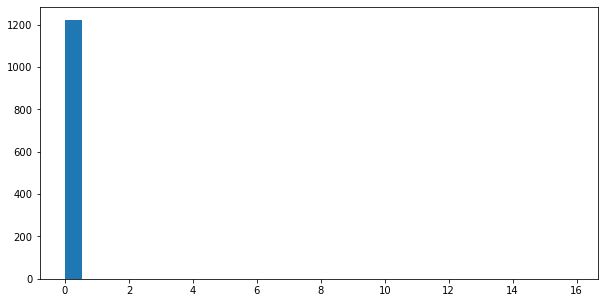

In [76]:
tthDays=[]
for i in tth_procce1_4['Обработка']:
    tthDays.append(i.seconds/3600)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()

[]

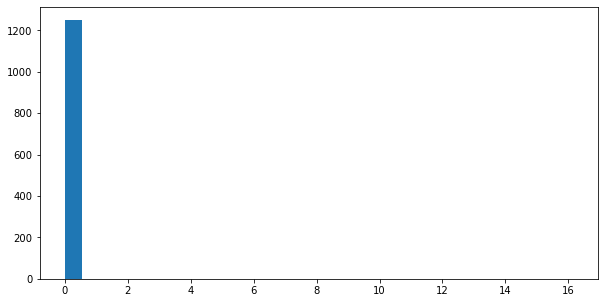

In [77]:
tthDays=[]
for i in tth_procce1_3['Обработка']:
    tthDays.append(i.seconds/3600)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()

In [38]:
tth_ITOG1

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
4845101,9 days 00:12:24,0 days 00:00:23,0 days 00:00:01,0 days 18:14:47,4 days 04:50:53
4838086,6 days 03:41:56,0 days 00:00:19,0 days 00:00:02,0 days 02:10:47,5 days 04:12:02
4821902,13 days 23:32:28,0 days 00:00:23,0 days 00:00:01,0 days 02:00:55,12 days 22:57:34
4835073,6 days 03:56:40,0 days 00:02:56,0 days 00:00:00,0 days 01:47:34,4 days 03:02:45
4819703,3 days 19:52:13,0 days 00:00:19,0 days 00:00:01,0 days 16:47:17,2 days 04:04:06
...,...,...,...,...,...
4869744,3 days 20:11:54,0 days 00:00:17,0 days 00:00:00,0 days 14:45:01,2 days 22:33:24
4869939,0 days 22:27:23,0 days 00:00:17,0 days 00:00:01,0 days 14:25:29,0 days 02:58:34
4870239,3 days 18:41:51,0 days 00:00:21,0 days 00:00:01,0 days 12:13:33,3 days 00:07:12
4870328,3 days 10:32:36,0 days 00:00:17,0 days 00:00:00,0 days 02:11:20,3 days 02:49:44


In [39]:
tth_int = tth_ITOG1.drop(['Обработка','СБ','Оформление','Time to hire'], axis = 1)
tth_int = tth_int.dropna(axis=0,how='all')
tth_int

,Интервью с руководителем
4845101,0 days 00:00:01
4838086,0 days 00:00:02
4821902,0 days 00:00:01
4835073,0 days 00:00:00
4819703,0 days 00:00:01
...,...
4869744,0 days 00:00:00
4869939,0 days 00:00:01
4870239,0 days 00:00:01
4870328,0 days 00:00:00


In [40]:
a = []
for i in tth_int.index.tolist():
    parthner = df_new[df_new['id_applicant'] == i]
    a.append(min(parthner[parthner['stage_name'] == 'Интервью с руководителем']['action_date']).month)
tth_int['month'] = a
tth_int

,Интервью с руководителем,month
4845101,0 days 00:00:01,4
4838086,0 days 00:00:02,4
4821902,0 days 00:00:01,3
4835073,0 days 00:00:00,4
4819703,0 days 00:00:01,3
...,...,...
4869744,0 days 00:00:00,4
4869939,0 days 00:00:01,4
4870239,0 days 00:00:01,4
4870328,0 days 00:00:00,4


In [41]:
df_new[df_new['id_applicant'] == 4869744]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
75600,4869744,3888623,-1,17997,2020-04-09 17:26:16,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
636937,4869744,3888623,27004658,17997,2020-04-09 17:26:32,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
636936,4869744,3888623,27004659,17997,2020-04-09 17:26:33,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
636934,4869744,3888623,27004663,17997,2020-04-09 17:26:34,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
636935,4869744,3888623,27004661,17997,2020-04-09 17:26:34,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False
636933,4869744,3888623,27004665,17997,2020-04-09 17:26:35,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
636931,4869744,3888623,27010146,17997,2020-04-10 08:11:35,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
636932,4869744,3888623,27010148,17997,2020-04-10 08:11:36,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
636930,4869744,3888623,27027502,17997,2020-04-10 15:04:46,Оформление,Назначить время на оформление,Недозвон,Продавец-кассир,True,False
636929,4869744,3888623,27033988,17997,2020-04-10 17:21:19,Оформление,Назначить время на оформление,Недозвон,Продавец-кассир,True,False


In [42]:
tth_int_3 = tth_int[tth_int['month'] == 3]
tth_int_4 = tth_int[tth_int['month'] == 4]

In [43]:
tth_int_3.describe()

,Интервью с руководителем,month
count,1347,1347.0
mean,0 days 12:46:43.210838901,3.0
std,1 days 15:14:58.447407320,0.0
min,0 days 00:00:00,3.0
25%,0 days 00:00:01,3.0
50%,0 days 00:00:01,3.0
75%,0 days 00:00:01,3.0
max,14 days 05:49:54,3.0


In [44]:
tth_int_4.describe()

,Интервью с руководителем,month
count,1237,1237.0
mean,0 days 07:06:40.937752627,4.0
std,0 days 22:12:51.631531120,0.0
min,0 days 00:00:00,4.0
25%,0 days 00:00:01,4.0
50%,0 days 00:00:01,4.0
75%,0 days 00:00:01,4.0
max,8 days 08:27:07,4.0


In [45]:

delta_int = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=5, 
                           hours=0, 
                           weeks=0)
tth_int1_3 = tth_int_3
tth_int1_3 = tth_int1_3.loc[tth_int1_3['Интервью с руководителем'] > delta_int]
tth_int1_3

,Интервью с руководителем,month
4827646,9 days 02:37:31,3
4820115,8 days 04:01:59,3
4822743,0 days 21:08:52,3
4828417,1 days 17:56:37,3
4816203,5 days 02:56:18,3
...,...,...
4828470,1 days 17:51:22,3
4828469,0 days 19:25:01,3
4828754,0 days 21:02:07,3
4828987,0 days 18:01:32,3


In [46]:
delta_int = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=5, 
                           hours=0, 
                           weeks=0)
tth_int1_4 = tth_int_4
tth_int1_4 = tth_int1_4.loc[tth_int1_4['Интервью с руководителем'] > delta_int]
tth_int1_4

,Интервью с руководителем,month
4847563,0 days 05:59:44,4
4834679,0 days 04:02:07,4
4836726,1 days 00:29:22,4
4834056,0 days 04:03:11,4
4831575,0 days 18:57:03,4
...,...,...
4859907,0 days 22:24:16,4
4865246,0 days 09:20:01,4
4862830,0 days 18:02:21,4
4862939,0 days 21:31:29,4


In [47]:
tth_int1_3.describe()

,Интервью с руководителем,month
count,293,293.0
mean,2 days 10:44:44.587030716,3.0
std,2 days 18:16:09.071300927,0.0
min,0 days 00:45:46,3.0
25%,0 days 19:25:01,3.0
50%,1 days 06:11:21,3.0
75%,3 days 04:28:20,3.0
max,14 days 05:49:54,3.0


[]

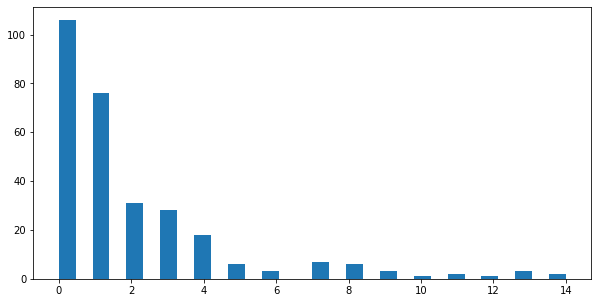

In [80]:
tthDays=[]
for i in tth_int1_3['Интервью с руководителем']:
    tthDays.append(i.days)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()

In [48]:
tth_int1_4.describe()

,Интервью с руководителем,month
count,215,215.0
mean,1 days 16:54:50.293023255,4.0
std,1 days 14:13:09.868977975,0.0
min,0 days 00:44:50,4.0
25%,0 days 20:10:18,4.0
50%,1 days 00:42:49,4.0
75%,2 days 00:30:42.500000,4.0
max,8 days 08:27:07,4.0


[]

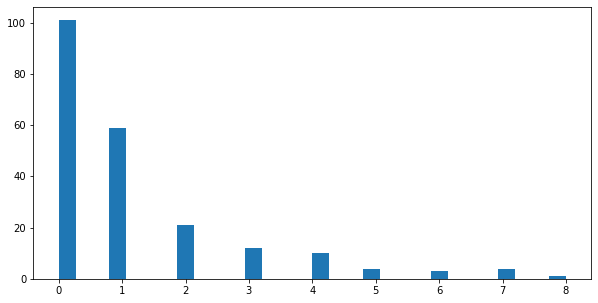

In [81]:
tthDays=[]
for i in tth_int1_4['Интервью с руководителем']:
    tthDays.append(i.days)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()

In [49]:
delta1_int = datetime.timedelta(days=14, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=0, 
                           weeks=0)
tth_int11_3 = tth_int_3
tth_int11_3 = tth_int11_3.loc[tth_int11_3['Интервью с руководителем'] > delta1_int]
tth_int11_3

,Интервью с руководителем,month
4808305,14 days 00:55:56,3
4815822,14 days 05:49:54,3


In [56]:
df_new[df_new['id_applicant']==4808305]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
125279,4808305,3844717,-1,34078,2020-03-25 15:48:35,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
302555,4808305,3844717,26632570,34078,2020-03-25 15:48:50,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
302554,4808305,3844717,26632572,34078,2020-03-25 15:48:51,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
302553,4808305,3844717,26632590,34078,2020-03-25 15:49:14,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False
302552,4808305,3844717,26632623,34078,2020-03-25 15:49:31,Интервью с руководителем,Узнать результаты интервью с руководителем,Перенос звонка,Продавец-кассир,True,False
302551,4808305,3844717,26860108,34078,2020-04-04 12:48:41,Интервью с руководителем,Узнать результаты интервью с руководителем,Недозвон,Продавец-кассир,True,False
302550,4808305,3844717,26868334,34078,2020-04-05 09:43:12,Интервью с руководителем,Узнать результаты интервью с руководителем,Недозвон,Продавец-кассир,True,False
302549,4808305,3844717,26967958,34078,2020-04-08 16:45:10,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
302548,4808305,3844717,26967960,34078,2020-04-08 16:45:11,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
302547,4808305,3844717,26967961,34078,2020-04-08 16:45:12,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False


In [50]:
tth_ITOG1

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
4845101,9 days 00:12:24,0 days 00:00:23,0 days 00:00:01,0 days 18:14:47,4 days 04:50:53
4838086,6 days 03:41:56,0 days 00:00:19,0 days 00:00:02,0 days 02:10:47,5 days 04:12:02
4821902,13 days 23:32:28,0 days 00:00:23,0 days 00:00:01,0 days 02:00:55,12 days 22:57:34
4835073,6 days 03:56:40,0 days 00:02:56,0 days 00:00:00,0 days 01:47:34,4 days 03:02:45
4819703,3 days 19:52:13,0 days 00:00:19,0 days 00:00:01,0 days 16:47:17,2 days 04:04:06
...,...,...,...,...,...
4869744,3 days 20:11:54,0 days 00:00:17,0 days 00:00:00,0 days 14:45:01,2 days 22:33:24
4869939,0 days 22:27:23,0 days 00:00:17,0 days 00:00:01,0 days 14:25:29,0 days 02:58:34
4870239,3 days 18:41:51,0 days 00:00:21,0 days 00:00:01,0 days 12:13:33,3 days 00:07:12
4870328,3 days 10:32:36,0 days 00:00:17,0 days 00:00:00,0 days 02:11:20,3 days 02:49:44


In [51]:
tth_sb = tth_ITOG1.drop(['Обработка','Интервью с руководителем','Оформление','Time to hire'], axis = 1)
tth_sb = tth_sb.dropna(axis=0,how='all')
tth_sb

,СБ
4845101,0 days 18:14:47
4838086,0 days 02:10:47
4821902,0 days 02:00:55
4835073,0 days 01:47:34
4819703,0 days 16:47:17
...,...
4869744,0 days 14:45:01
4869939,0 days 14:25:29
4870239,0 days 12:13:33
4870328,0 days 02:11:20


In [52]:
a = []
for i in tth_sb.index.tolist():
    parthner = df_new[df_new['id_applicant'] == i]
    a.append(min(parthner[parthner['stage_name'] == 'СБ']['action_date']).month)
tth_sb['month'] = a
tth_sb

,СБ,month
4845101,0 days 18:14:47,4
4838086,0 days 02:10:47,4
4821902,0 days 02:00:55,3
4835073,0 days 01:47:34,4
4819703,0 days 16:47:17,3
...,...,...
4869744,0 days 14:45:01,4
4869939,0 days 14:25:29,4
4870239,0 days 12:13:33,4
4870328,0 days 02:11:20,4


In [53]:
tth_sb_1 = tth_sb[tth_sb['month'] == 1]
tth_sb_2 = tth_sb[tth_sb['month'] == 2]
tth_sb_3 = tth_sb[tth_sb['month'] == 3]
tth_sb_4 = tth_sb[tth_sb['month'] == 4]

In [54]:
tth_sb_3

,СБ,month
4821902,0 days 02:00:55,3
4819703,0 days 16:47:17,3
4820369,0 days 02:06:13,3
4827264,0 days 02:06:06,3
4823627,0 days 16:08:36,3
...,...,...
4828896,0 days 14:59:16,3
4828989,0 days 14:46:31,3
4829038,0 days 14:14:26,3
4829044,0 days 14:10:41,3


In [55]:
tth_sb_3.describe()

,СБ,month
count,1286,1286.0
mean,0 days 10:06:19.942457231,3.0
std,0 days 16:10:20.435544566,0.0
min,0 days 00:00:00,3.0
25%,0 days 01:48:04.250000,3.0
50%,0 days 02:20:44,3.0
75%,0 days 15:41:36.500000,3.0
max,11 days 06:46:49,3.0


In [56]:
tth_sb_4.describe()

,СБ,month
count,1352,1352.0
mean,0 days 08:41:44.026627218,4.0
std,0 days 09:16:09.349220500,0.0
min,0 days 00:00:00,4.0
25%,0 days 01:45:35.750000,4.0
50%,0 days 02:48:33.500000,4.0
75%,0 days 16:52:05,4.0
max,2 days 23:15:11,4.0


In [57]:
delta_sb = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=5, 
                           hours=0, 
                           weeks=0)
tth_sb1_3 = tth_sb_3
tth_sb1_3 = tth_sb1_3.loc[tth_sb1_3['СБ'] > delta_sb]
tth_sb1_3

,СБ,month
4821902,0 days 02:00:55,3
4819703,0 days 16:47:17,3
4820369,0 days 02:06:13,3
4827264,0 days 02:06:06,3
4823627,0 days 16:08:36,3
...,...,...
4828896,0 days 14:59:16,3
4828989,0 days 14:46:31,3
4829038,0 days 14:14:26,3
4829044,0 days 14:10:41,3


In [58]:
delta_sb = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=5, 
                           hours=0, 
                           weeks=0)
tth_sb1_4 = tth_sb_4
tth_sb1_4 = tth_sb1_4.loc[tth_sb1_4['СБ'] > delta_sb]
tth_sb1_4

,СБ,month
4845101,0 days 18:14:47,4
4838086,0 days 02:10:47,4
4835073,0 days 01:47:34,4
4848395,0 days 02:11:46,4
4847563,0 days 17:11:40,4
...,...,...
4869744,0 days 14:45:01,4
4869939,0 days 14:25:29,4
4870239,0 days 12:13:33,4
4870328,0 days 02:11:20,4


In [59]:
tth_sb1_3.describe()

,СБ,month
count,1188,1188.0
mean,0 days 10:56:20.702861952,3.0
std,0 days 16:33:12.015003072,0.0
min,0 days 00:32:51,3.0
25%,0 days 01:54:29.750000,3.0
50%,0 days 02:33:19,3.0
75%,0 days 15:51:20.250000,3.0
max,11 days 06:46:49,3.0


[]

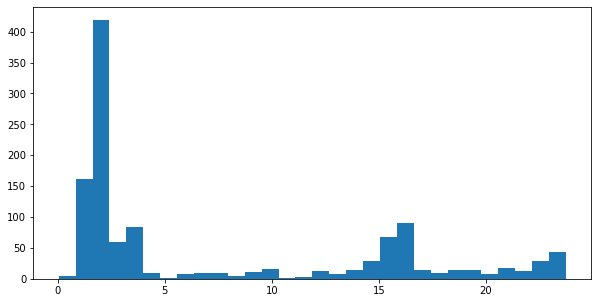

In [86]:
tthDays=[]
for i in tth_sb1_3['СБ']:
    tthDays.append(i.seconds/3600)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()

In [60]:
tth_sb1_4.describe()

,СБ,month
count,1244,1244.0
mean,0 days 09:27:01.396302250,4.0
std,0 days 09:17:12.775517533,0.0
min,0 days 00:27:42,4.0
25%,0 days 01:58:13.750000,4.0
50%,0 days 03:21:25.500000,4.0
75%,0 days 17:02:52,4.0
max,2 days 23:15:11,4.0


[]

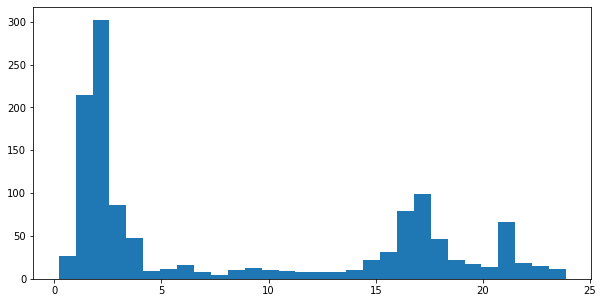

In [87]:
tthDays=[]
for i in tth_sb1_4['СБ']:
    tthDays.append(i.seconds/3600)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()

In [61]:
delta1_sb = datetime.timedelta(days=10, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=0, 
                           hours=0, 
                           weeks=0)
tth_sb11_3 = tth_sb_3
tth_sb11_3 = tth_sb11_3.loc[tth_sb11_3['СБ'] > delta1_sb]
tth_sb11_3

,СБ,month
4811887,11 days 06:46:49,3


In [91]:
df_new[df_new['id_applicant']==4811887]

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
46336,4811887,3855033,-1,36446,2020-03-26 11:56:56,Создание кандидата,NaN,NaN,Продавец-кассир,True,False
241080,4811887,3855033,26656836,36446,2020-03-26 11:57:24,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,True,False
241081,4811887,3855033,26656837,36446,2020-03-26 11:57:25,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
241082,4811887,3855033,26656838,36446,2020-03-26 11:57:26,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,True,False
241083,4811887,3855033,26656839,36446,2020-03-26 11:57:27,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,True,False
241084,4811887,3855033,26656840,36446,2020-03-26 11:57:27,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,True,False
241076,4811887,3855033,26905390,36446,2020-04-06 18:44:16,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,True,False
241077,4811887,3855033,26905391,36446,2020-04-06 18:44:16,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,True,False
241075,4811887,3855033,26953152,36446,2020-04-08 12:04:14,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,True,False
241074,4811887,3855033,26953156,36446,2020-04-08 12:04:21,Оформление,Узнать результаты приема,Принят,Продавец-кассир,True,False


In [62]:
tth_ITOG1

,Time to hire,Обработка,Интервью с руководителем,СБ,Оформление
4845101,9 days 00:12:24,0 days 00:00:23,0 days 00:00:01,0 days 18:14:47,4 days 04:50:53
4838086,6 days 03:41:56,0 days 00:00:19,0 days 00:00:02,0 days 02:10:47,5 days 04:12:02
4821902,13 days 23:32:28,0 days 00:00:23,0 days 00:00:01,0 days 02:00:55,12 days 22:57:34
4835073,6 days 03:56:40,0 days 00:02:56,0 days 00:00:00,0 days 01:47:34,4 days 03:02:45
4819703,3 days 19:52:13,0 days 00:00:19,0 days 00:00:01,0 days 16:47:17,2 days 04:04:06
...,...,...,...,...,...
4869744,3 days 20:11:54,0 days 00:00:17,0 days 00:00:00,0 days 14:45:01,2 days 22:33:24
4869939,0 days 22:27:23,0 days 00:00:17,0 days 00:00:01,0 days 14:25:29,0 days 02:58:34
4870239,3 days 18:41:51,0 days 00:00:21,0 days 00:00:01,0 days 12:13:33,3 days 00:07:12
4870328,3 days 10:32:36,0 days 00:00:17,0 days 00:00:00,0 days 02:11:20,3 days 02:49:44


In [63]:
tth_ofo = tth_ITOG1.drop(['Обработка','Интервью с руководителем','СБ','Time to hire'], axis = 1)
tth_ofo = tth_ofo.dropna(axis=0,how='all')
tth_ofo

,Оформление
4845101,4 days 04:50:53
4838086,5 days 04:12:02
4821902,12 days 22:57:34
4835073,4 days 03:02:45
4819703,2 days 04:04:06
...,...
4869744,2 days 22:33:24
4869939,0 days 02:58:34
4870239,3 days 00:07:12
4870328,3 days 02:49:44


In [64]:
a = []
for i in tth_ofo.index.tolist():
    parthner = df_new[df_new['id_applicant'] == i]
    a.append(min(parthner[parthner['stage_name'] == 'Оформление']['action_date']).month)
tth_ofo['month'] = a
tth_ofo

,Оформление,month
4845101,4 days 04:50:53,4
4838086,5 days 04:12:02,4
4821902,12 days 22:57:34,3
4835073,4 days 03:02:45,4
4819703,2 days 04:04:06,3
...,...,...
4869744,2 days 22:33:24,4
4869939,0 days 02:58:34,4
4870239,3 days 00:07:12,4
4870328,3 days 02:49:44,4


In [65]:
tth_ofo_1 = tth_ofo[tth_ofo['month'] == 1]
tth_ofo_2 = tth_ofo[tth_ofo['month'] == 2]
tth_ofo_3 = tth_ofo[tth_ofo['month'] == 3]
tth_ofo_4 = tth_ofo[tth_ofo['month'] == 4]

In [66]:
tth_ofo_3

,Оформление,month
4821902,12 days 22:57:34,3
4819703,2 days 04:04:06,3
4820369,6 days 04:49:40,3
4823627,6 days 19:44:19,3
4819952,3 days 07:12:57,3
...,...,...
4828982,2 days 22:39:18,3
4825985,2 days 23:44:51,3
4826028,6 days 16:53:09,3
4826231,5 days 23:45:28,3


In [67]:
tth_ofo_3.describe()

,Оформление,month
count,996,996.0
mean,6 days 09:40:17.324297188,3.0
std,3 days 15:56:18.502348720,0.0
min,0 days 00:00:06,3.0
25%,3 days 18:46:00.250000,3.0
50%,6 days 03:23:54.500000,3.0
75%,8 days 03:51:15.250000,3.0
max,18 days 03:36:11,3.0


In [68]:
tth_ofo_4.describe()

,Оформление,month
count,1642,1642.0
mean,3 days 08:47:49.985992691,4.0
std,2 days 14:30:44.637579492,0.0
min,0 days 00:00:03,4.0
25%,1 days 01:29:21.500000,4.0
50%,3 days 05:02:45.500000,4.0
75%,5 days 01:14:52,4.0
max,12 days 20:36:10,4.0


In [69]:
delta_ofo = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=30, 
                           hours=0, 
                           weeks=0)
tth_ofo1_3 = tth_ofo_3
tth_ofo1_3 = tth_ofo1_3.loc[tth_ofo1_3['Оформление'] > delta_ofo]
tth_ofo1_3

,Оформление,month
4821902,12 days 22:57:34,3
4819703,2 days 04:04:06,3
4820369,6 days 04:49:40,3
4823627,6 days 19:44:19,3
4819952,3 days 07:12:57,3
...,...,...
4828982,2 days 22:39:18,3
4825985,2 days 23:44:51,3
4826028,6 days 16:53:09,3
4826231,5 days 23:45:28,3


In [70]:
delta_ofo = datetime.timedelta(days=0, 
                           seconds=0, 
                           microseconds=0, 
                           milliseconds=0, 
                           minutes=30, 
                           hours=0, 
                           weeks=0)
tth_ofo1_4 = tth_ofo_4
tth_ofo1_4 = tth_ofo1_4.loc[tth_ofo1_4['Оформление'] > delta_ofo]
tth_ofo1_4

,Оформление,month
4845101,4 days 04:50:53,4
4838086,5 days 04:12:02,4
4835073,4 days 03:02:45,4
4827264,6 days 21:29:21,4
4847563,4 days 23:19:03,4
...,...,...
4869744,2 days 22:33:24,4
4869939,0 days 02:58:34,4
4870239,3 days 00:07:12,4
4870328,3 days 02:49:44,4


In [71]:
tth_ofo1_3.describe()

,Оформление,month
count,984,984.0
mean,6 days 11:32:43.751016260,3.0
std,3 days 14:48:32.212034310,0.0
min,0 days 03:16:10,3.0
25%,3 days 22:03:02,3.0
50%,6 days 03:55:14.500000,3.0
75%,8 days 03:59:46.250000,3.0
max,18 days 03:36:11,3.0


[]

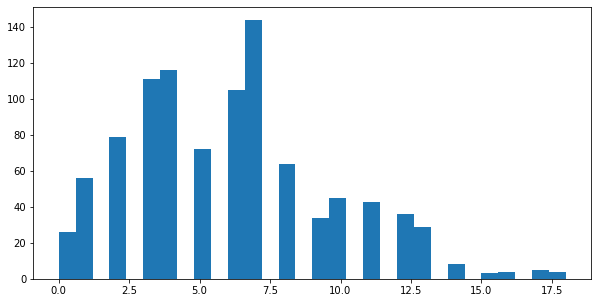

In [89]:
tthDays=[]
for i in tth_ofo1_3['Оформление']:
    tthDays.append(i.days)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()

In [72]:
tth_ofo1_4.describe()

,Оформление,month
count,1417,1417.0
mean,3 days 21:37:30.186309103,4.0
std,2 days 09:40:49.200833446,0.0
min,0 days 00:35:33,4.0
25%,1 days 23:59:53,4.0
50%,4 days 00:44:59,4.0
75%,5 days 03:01:51,4.0
max,12 days 20:36:10,4.0


[]

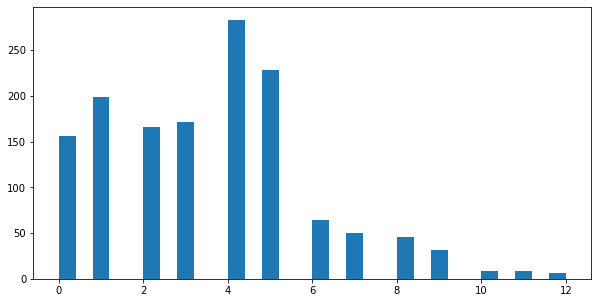

In [90]:
tthDays=[]
for i in tth_ofo1_4['Оформление']:
    tthDays.append(i.days)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(tthDays, bins = 30)
ax.plot()